In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

file = "Data/Shootings_wash_post.csv"

# Read our Police Shootings data into pandas
shootings_df = pd.read_csv(file)
shootings_df.head()



,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [2]:
shootings_df['year'] = pd.DatetimeIndex(shootings_df['date']).year
#shootings_df.head(60)
shootings_df['year'] = pd.to_numeric(shootings_df['year'])
print (shootings_df)

        id                name        date   manner_of_death         armed  \
0        3          Tim Elliot  2015-01-02              shot           gun   
1        4    Lewis Lee Lembke  2015-01-02              shot           gun   
2        5  John Paul Quintero  2015-01-03  shot and Tasered       unarmed   
3        8     Matthew Hoffman  2015-01-04              shot    toy weapon   
4        9   Michael Rodriguez  2015-01-04              shot      nail gun   
...    ...                 ...         ...               ...           ...   
5547  6048               TK TK  2020-08-15              shot         knife   
5548  6042        Thomas Moles  2020-08-16              shot  undetermined   
5549  6043  Jose Manuel Castro  2020-08-16              shot         knife   
5550  6044     Jeffrey Hubbard  2020-08-16              shot           gun   
5551  6045               TK TK  2020-08-16              shot           gun   

       age gender race           city state  signs_of_mental_il

In [3]:
unique_race_list = shootings_df["race"].unique()
print(unique_race_list)



['A' 'W' 'H' 'B' 'O' nan 'N']


In [4]:
#clean the data - drop nan 
clean_shootings_df = shootings_df.dropna()
clean_shootings_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5538,6062,Kenneth Reiss,2020-08-10,shot,gun,50.0,M,W,Albuquerque,NM,False,attack,Foot,False,2020
5545,6046,Anthony McClain,2020-08-15,shot,gun,32.0,M,B,Pasadena,CA,False,other,Foot,False,2020
5548,6042,Thomas Moles,2020-08-16,shot,undetermined,35.0,M,W,Maury County,TN,False,other,Other,False,2020
5549,6043,Jose Manuel Castro,2020-08-16,shot,knife,27.0,M,H,Dos Palos,CA,False,other,Not fleeing,False,2020


In [5]:
unique_race_list = clean_shootings_df["race"].unique()
print(unique_race_list)

['A' 'W' 'H' 'B' 'O' 'N']


In [6]:
# clean_shootings2_df = pd.DataFrame(columns=['race','count'])
# clean_shootings2_df = clean_shootings_df["race"].value_counts()
# clean_shootings2_df

In [7]:
# for race in unique_race_list:
#     count = shootings_df["race"].value_counts()
#     print(count)

In [8]:
#number of police shootings by race
count = clean_shootings_df["race"].value_counts()
count

W    2292
B    1184
H     801
A      83
N      71
O      43
Name: race, dtype: int64

In [9]:
white = count.W
black = count.B
hispanic = count.H
asian = count.A
native = count.N
other = count.O
print (other)

43


In [10]:
#number of police shootings by year
count_year = clean_shootings_df["year"].value_counts()
count_year

2015    900
2016    824
2018    805
2017    791
2019    763
2020    391
Name: year, dtype: int64

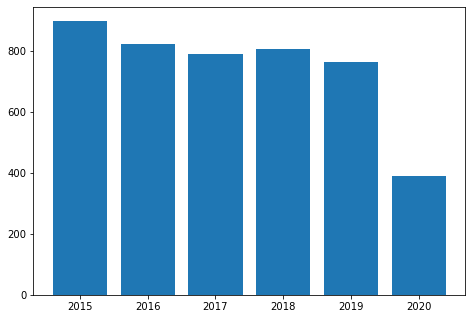

In [11]:
#plot police shootings over time
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = ['2015', '2016', '2017', '2018', '2019', '2020']
shootings = [900,824,791,805,763,391]
ax.bar(years,shootings)
plt.show()

In [12]:
#count_year[1]

            id      name      date  manner_of_death     armed       age  \
race                                                                      
A     0.022280  0.022280  0.022280         0.022280  0.022280  0.022280   
B     0.297510  0.297510  0.297510         0.297510  0.297510  0.297510   
H     0.180865  0.180865  0.180865         0.180865  0.180865  0.180865   
N     0.014417  0.014417  0.014417         0.014417  0.014417  0.014417   
O     0.010485  0.010485  0.010485         0.010485  0.010485  0.010485   
W     0.474443  0.474443  0.474443         0.474443  0.474443  0.474443   

        gender      city     state  signs_of_mental_illness  threat_level  \
race                                                                        
A     0.022280  0.022280  0.022280                 0.022280      0.022280   
B     0.297510  0.297510  0.297510                 0.297510      0.297510   
H     0.180865  0.180865  0.180865                 0.180865      0.180865   
N     0.014417

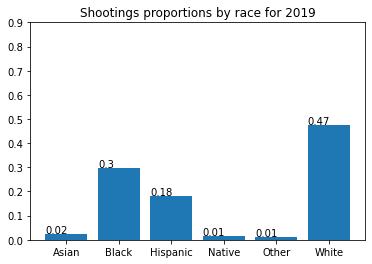

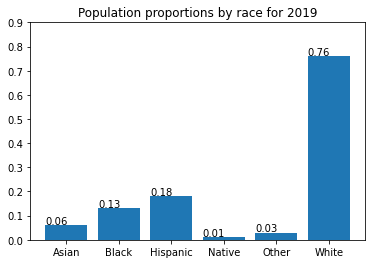

In [13]:
#number of police shootings by race for a certain year - say 2019
#population for each race over total population that certain year
slice_2019 = clean_shootings_df.loc[shootings_df['year']==2019] 
#all shootings for 2019
count_2019 = slice_2019['year'].count()
#shootings for 2019 by race
grouped2019 = slice_2019.groupby(['race']).count()

array2019 = grouped2019['id']

#proportion shootings by race for 2019
proportion_by_race = grouped2019/count_2019
print (proportion_by_race)
print (proportion_by_race['id'])

#population proportions by race for year 2019 in order from ['Asian', 'Black', 'Hispanic', 'Native', 'Other', 'White']
population_prop = [0.06,0.13,0.18,0.01,0.03,0.76]
print(population_prop)

sorted_race_list = ['Asian', 'Black', 'Hispanic', 'Native', 'Other', 'White']
#plot proportion_by_race and population_prop versus sorted_race_list on the same graph side by side


# plt.bar(sorted_race_list, proportion_by_race['id'])
# plt.title("Shootings proportions by race for 2019")
# plt.ylim(ymax = 0.7, ymin = 0)
# plt.show()
# plt.bar(sorted_race_list, population_prop)
# plt.title("Population proportions by race for 2019")
# plt.show()

bars = plt.bar(sorted_race_list, proportion_by_race['id'])
plt.title("Shootings proportions by race for 2019")
plt.ylim(ymax = 0.9, ymin = 0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, round(yval, 2))

plt.show()

bars2 = plt.bar(sorted_race_list, population_prop)
plt.title("Population proportions by race for 2019")
plt.ylim(ymax = 0.9, ymin = 0)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, round(yval, 2))
plt.show()

# # assign your bars to a variable so their attributes can be accessed
# bars = plt.bar(x, height=y, width=.4)

# # access the bar attributes to place the text in the appropriate location
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x(), yval + .005, yval)


# #this does a line graph
# plt.plot(sorted_race_list, proportion_by_race['id'], 'r')
# # plt.title("")
# # plt.show()
# plt.plot(sorted_race_list, population_prop, 'b')
# plt.show()

In [14]:
#grouped_df = shootings_df.groupby(['year','race']).count()['id']


#print (grouped_df)

# for year in  unique years in shootings_df
#     year_slice[] = shootings_df.loc([shootings_df[]'year']= year)

# for each year
#     for each race
#         array (i)(j) = police shootings for that year and race

#2015
#slice_2015 = shootings_df.loc[row = shootings_df['year']]
slice_2015 = clean_shootings_df.loc[shootings_df['year']==2015] 
count_2015 = slice_2015['year'].count()
print ("count_2015")
print (count_2015)
#print (slice_2015)

grouped2015 = slice_2015.groupby(['race']).count()
#grouped2015 = slice_2015['id', 'race'].groupby(['race']).count()
print (grouped2015)
array2015 = grouped2015['id']
#print (array2015)

#2016
slice_2016 = clean_shootings_df.loc[shootings_df['year']==2016] 
count_2016 = slice_2016['year'].count()
grouped2016 = slice_2016.groupby(['race']).count()
array2016 = grouped2016['id']

#2017
slice_2017 = clean_shootings_df.loc[shootings_df['year']==2017] 
count_2017 = slice_2017['year'].count()
print ("count_2017")
print (count_2017)
grouped2017 = slice_2017.groupby(['race']).count()

array2017 = grouped2017['id']

#2018
slice_2018 = clean_shootings_df.loc[shootings_df['year']==2018] 
count_2018 = slice_2018['year'].count()
grouped2018 = slice_2018.groupby(['race']).count()

array2018 = grouped2018['id']

#2019
slice_2019 = clean_shootings_df.loc[shootings_df['year']==2019] 
count_2019 = slice_2019['year'].count()
grouped2019 = slice_2019.groupby(['race']).count()

array2019 = grouped2019['id']

#2020
#slice_2020 = clean_shootings_df.loc[row = shootings_df['year']]
slice_2020 = clean_shootings_df.loc[shootings_df['year']==2020] 
count_2020 = slice_2020['year'].count()
#print (slice_2020)

grouped2020 = slice_2020.groupby(['race']).count()
#grouped2020 = slice_2020['id', 'race'].groupby(['race']).count()
#print (grouped2020)
array2020 = grouped2020['id']
#print (array2020)

# matrix = np.array(array2015, array2020)
# print (matrix)
matrix = [array2015, array2016, array2017, array2018, array2019, array2020]
# print (matrix)
# np.array (matrix)
# plt.plot (np.array (matrix))
police_shootings = np.array(matrix)
print (police_shootings)

count_2015
900
       id  name  date  manner_of_death  armed  age  gender  city  state  \
race                                                                      
A      12    12    12               12     12   12      12    12     12   
B     232   232   232              232    232  232     232   232    232   
H     161   161   161              161    161  161     161   161    161   
N       8     8     8                8      8    8       8     8      8   
O      15    15    15               15     15   15      15    15     15   
W     472   472   472              472    472  472     472   472    472   

      signs_of_mental_illness  threat_level  flee  body_camera  year  
race                                                                  
A                          12            12    12           12    12  
B                         232           232   232          232   232  
H                         161           161   161          161   161  
N                           8

[[ 12  14  13  20  17   7]
 [232 214 192 207 227 112]
 [161 142 154 141 138  65]
 [  8  15  19  15  11   3]
 [ 15   9   5   3   8   3]
 [472 430 408 419 362 201]]


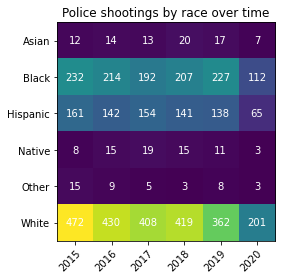

In [15]:
race_list = clean_shootings_df.race.unique()
# sorted_race_list = race_list.sort()
# print (sorted_race_list)
sorted_race_list = ['Asian', 'Black', 'Hispanic', 'Native', 'Other', 'White']

#year_list = unique list of years
year_list = clean_shootings_df.year.unique()

# year_list = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
#            "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

police_shootings = np.array(matrix).transpose()
print (police_shootings)


fig, ax = plt.subplots()
im = ax.imshow(police_shootings)

# We want to show all ticks...
ax.set_xticks(np.arange(len(year_list)))
ax.set_yticks(np.arange(len(race_list)))
# ... and label them with the respective list entries
ax.set_xticklabels(year_list)
ax.set_yticklabels(sorted_race_list)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(race_list)):
    for j in range(len(year_list)):
        text = ax.text(j, i, police_shootings[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Police shootings by race over time")
fig.tight_layout()
plt.show()

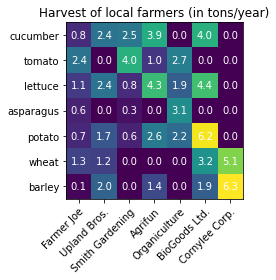

In [16]:
#code that I used as an example for the police shootings matrix chart:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [17]:
#How many people that were unarmed and not fleeing were shot by the police over time

In [18]:
#ideas for plots
#https://www.tandfonline.com/doi/full/10.1080/2330443X.2019.1704330
#https://www.scientificamerican.com/article/what-the-data-say-about-police-shootings/

In [19]:
#divide the no of shootings for a  certain race and year by the total number of shootings that year
#divide the number of people for a race and year by the population that year